In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.pipeline import Pipeline

In [ ]:
iris_data_set=pd.read_csv("/content/IRIS.csv")

In [ ]:
iris_data_set.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data_set.shape

(150, 5)

In [ ]:
iris_data_set.value_counts(["species"])

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
iris_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_data_set.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
iris_data_set["species"].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2},inplace=True)

In [ ]:
iris_data_set.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

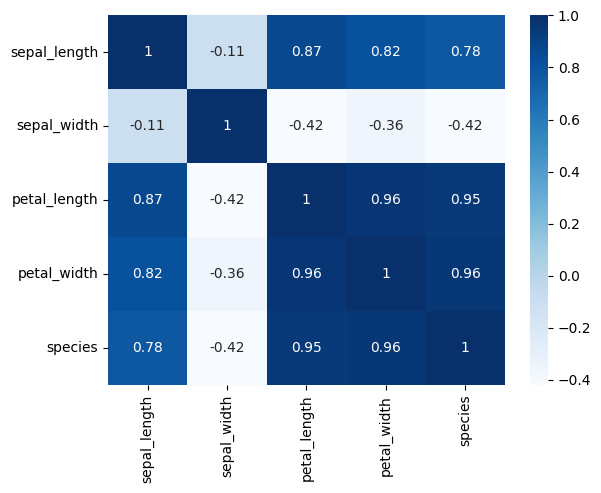

In [ ]:
sns.heatmap(iris_data_set.corr(),annot=True,cmap="Blues")

([<matplotlib.patches.Wedge at 0x7f72ceb4eda0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris-setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris-versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris-virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

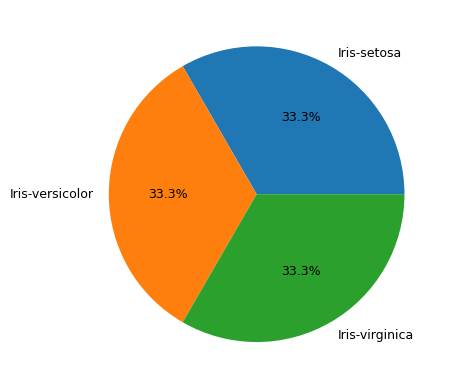

In [ ]:
plt.pie(iris_data_set["species"].value_counts(),labels=["Iris-setosa","Iris-versicolor","Iris-virginica"],autopct='%1.1f%%',
                                    textprops={'fontsize':9})

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(iris_data_set.drop("species",axis=1),iris_data_set["species"],test_size=0.2,random_state=42)


In [ ]:
model=tree.DecisionTreeClassifier()


In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred=model.predict(X_test)

In [ ]:
print(f"Accuray Score: {accuracy_score(y_test,pred)*100}")
print(f"R2 Score: {r2_score(y_test,pred)*100}")
print("\n",classification_report(y_test,pred))
conf_matrix=confusion_matrix(y_test,pred)
print(conf_matrix)

Accuray Score: 100.0
R2 Score: 100.0

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<Axes: >

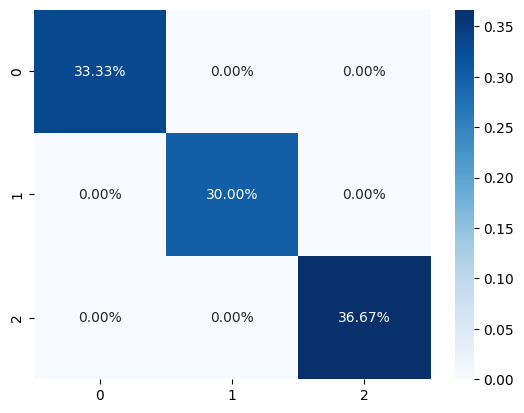

In [ ]:
sns.heatmap(conf_matrix/np.sum(conf_matrix),annot=True,cmap="Blues",fmt=".02%")